### Instead of resampling randoms, weigh randoms by their fc. 

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import sys; sys.path.insert(0, '/global/homes/y/yfeng1/source/skymapper/')

In [82]:
import aea_projection
reload(aea_projection)

<module 'aea_projection' from '/global/homes/y/yfeng1/source/skymapper/aea_projection.py'>

In [6]:
from imaginglss.utils import output

In [7]:
import sys; sys.path.insert(0, '/global/homes/e/elliek/kdcount')

from kdcount import KDTree, KDAttr
from kdcount.utils import constant_array

import healpy

import numpy as np
from numpy.testing import assert_equal, run_module_suite
from scipy.interpolate import griddata

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import rcParams
rcParams["image.interpolation"] = "nearest"
rcParams["image.aspect"] = "equal"

In [8]:
gal_n = output.read_text('/global/homes/y/yfeng1/m779/imaginglss/object_cats/QSO/QSO.txt', 'NOISES')

In [9]:
gal_f = output.read_text('/global/homes/y/yfeng1/m779/imaginglss/object_cats/QSO/QSO.txt', 'FLUXES')

In [10]:
ran_fc = output.read_text('/global/homes/y/yfeng1/m779/imaginglss/random_cats/QSO/QSO_rand.txt', 'FC')

In [11]:
ran_n = output.read_text('/global/homes/y/yfeng1/m779/imaginglss/random_cats/QSO/QSO_rand.txt', 'NOISES')

In [12]:
def hpmean(nside, ra, dec, value):
    return hpsum(nside, ra, dec, value) / hpsum(nside, ra, dec)
def hpsum(nside, ra, dec, value=None):
    p = healpy.ang2pix(nside, numpy.radians(90 - dec), numpy.radians(ra))
    npix = healpy.nside2npix(nside)
    w = numpy.bincount(p, weights=value, minlength=npix)
    return w

In [13]:
gal_conf = gal_f['DECAM_INTRINSIC_FLUX'] / gal_n['DECAM_INTRINSIC_NOISE_LEVEL']

In [14]:
confident_gal_mask = (gal_conf[:, 1] > 5)
confident_gal_mask &= (gal_conf[:, 2] > 5)
confident_gal_mask &= (gal_conf[:, 4] > 3)

In [34]:
meanfc = hpmean(64, ran_n['RA'], ran_n['DEC'], ran_fc['COMPLETENESS'])
gal_density = hpsum(64, gal_f['RA'][confident_gal_mask], gal_f['DEC'][confident_gal_mask])
ran_density = hpsum(64, ran_n['RA'], ran_n['DEC'], ran_fc['COMPLETENESS'])

In [75]:
ran_noise_r = hpmean(64, ran_n['RA'], ran_n['DEC'], ran_n['DECAM_INTRINSIC_NOISE_LEVEL'][:, 1].clip(0, 0.07))

In [16]:
norm = (gal_density / ran_density)[meanfc>0.9].mean()

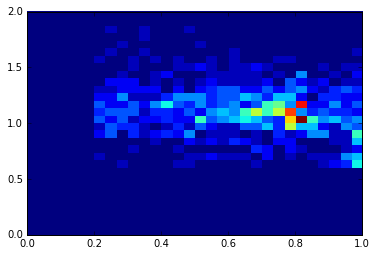

In [41]:
#_ = hist2d(gal_density, ran_density, bins=(100, 100), norm=matplotlib.colors.LogNorm())
_ = hist2d(meanfc[meanfc> 0.2], (gal_density / ran_density / norm)[meanfc>0.2], 
           bins=(30, 30), range=((0, 1), (0, 2)))

In [59]:
print isinf(ran_n['DECAM_INTRINSIC_NOISE_LEVEL'][:, 1]).any()

True


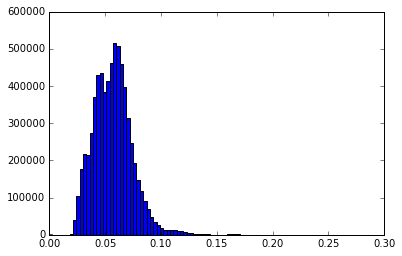

In [57]:
_ = hist(ran_n['DECAM_INTRINSIC_NOISE_LEVEL'][:, 1], range=(0, 0.3), bins=100)

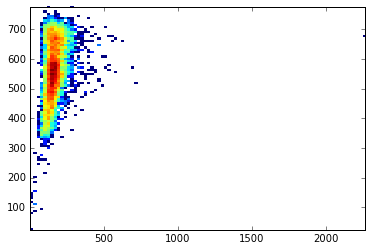

In [14]:
#_ = hist2d(gal_density, ran_density, bins=(100, 100), norm=matplotlib.colors.LogNorm())
_ = hist2d(gal_density[meanfc > 0.5], ran_density[meanfc>0.5], bins=(100, 100), norm=matplotlib.colors.LogNorm())

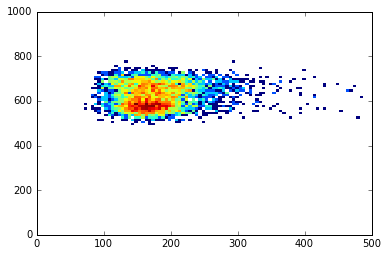

In [15]:
h_ = hist2d(gal_density[meanfc > 0.8], ran_density[meanfc>0.8], bins=(100, 100), range=((0, 500),(0, 1000)),  norm=matplotlib.colors.LogNorm())

In [16]:
nran = ran_fc['COMPLETENESS'].sum()

In [34]:
aea_projection.SkymapperAxes?

In [109]:
reload(aea_projection)

<module 'aea_projection' from '/global/homes/y/yfeng1/source/skymapper/aea_projection.py'>

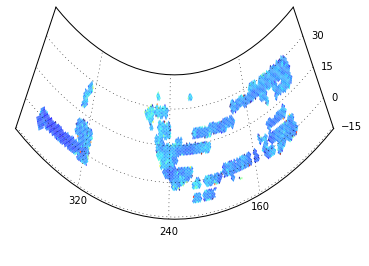

In [110]:
ax = subplot(projection='aea')
ax.set_ylim(-16, 45)
ax.set_xlim(90, 380)
ax.grid()
ax.mapshow(gal_density / ran_density, vmin=0, vmax=1.2, )

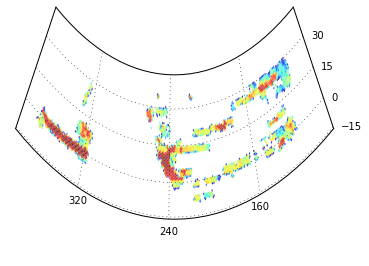

In [111]:
ax = subplot(projection='aea')
ax.set_xlim(90, 380)
ax.set_ylim(-16, 45)
ax.grid()
ax.mapshow(meanfc, meanfc>0.5)

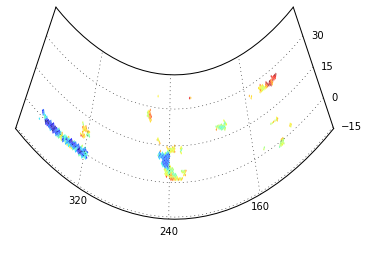

In [112]:
ax = subplot(projection='aea')
ax.set_xlim(90, 380)
ax.set_ylim(-16, 45)
ax.grid()
ax.mapshow(ran_noise_r, meanfc>0.9)

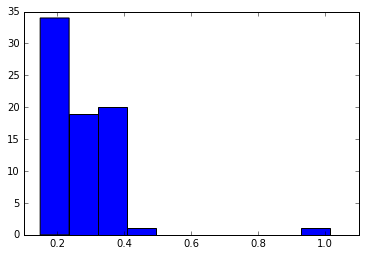

In [43]:
mask = meanfc > 0.995
_ = hist(gal_density[mask] / ran_density[mask])
ang = healpy.pix2ang(64, mask.nonzero()[0])

1012.06525661
667.058693292


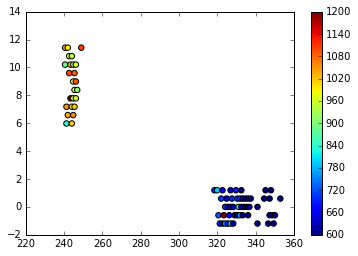

In [46]:
dens =gal_density[mask] / ran_density[mask] * ran_density[mask].max()
scatter(numpy.degrees(ang[1]), 90 - numpy.degrees(ang[0]), 
        c=dens, s=30, 
        vmax=1200, vmin=600)
colorbar()

print dens[numpy.degrees(ang[1]) < 280].mean()
print dens[numpy.degrees(ang[1]) > 280].mean()

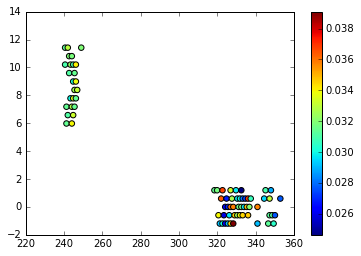

In [81]:
scatter(numpy.degrees(ang[1]), 90 - numpy.degrees(ang[0]), 
        c=ran_noise_r[mask], s=30)
colorbar()

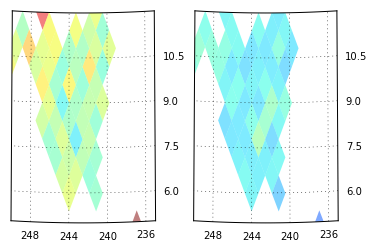

In [125]:
ax = subplot(121, projection='aea')
ax.set_xlim(235, 250)
ax.set_ylim(5, 12)
ax.grid()
ax.mapshow(ran_noise_r, meanfc>=0.99, linewidth=0, alpha=0.5, vmax=0.04)
ax = subplot(122, projection='aea')
ax.set_xlim(235, 250)
ax.set_ylim(5, 12)
ax.grid()
ax.mapshow(gal_density / ran_density, meanfc>=0.99, vmin=0, vmax=1., linewidth=0, alpha=0.5)

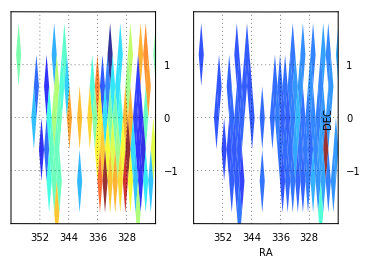

In [126]:
ax = subplot(121, projection='aea')
ax.set_xlim(320, 360)
ax.set_ylim(-2, 2)
ax.grid()
ax.mapshow(ran_noise_r, meanfc>0.99, vmax=0.04)
ax = subplot(122, projection='aea')
ax.set_xlim(320, 360)
ax.set_ylim(-2, 2)
ax.set_xlabel('RA')
ax.set_ylabel('DEC')
ax.grid()
ax.mapshow(gal_density / ran_density, meanfc > 0.99, vmin=0, vmax=1., )

In [ ]:
ax = subplot(projection='aea', 
             dec_0=40, dec_1=-20, dec_2=40)
ax.set_xlim(0, 360)
ax.mapshow(gal_density / ran_density, ran_density > 0) #, vmin=0, vmax=1.2, )


In [18]:
_ = hist2d((1.0 * ngal / nran * nran[meanfc>0.90].sum() / ngal[meanfc>0.90].sum() - 1)[mask2], 
        meanfc[mask2], bins=(40, 40),)
        #norm=matplotlib.colors.LogNorm())
axvline(0)
xlabel('overdensity')
ylabel('completeness')

NameError: name 'ngal' is not defined

In [ ]:
healpy.mollview(1.0 * ngal / nran * nran.sum() / ngal.sum() - 1, max=1, rot=(-120,0,0), title='ELGs')